## Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

## 
Min-Max scaling, also known as normalization, is a data preprocessing technique used to scale numeric features to a fixed range, typically [0, 1]. It is commonly applied to ensure that all features have the same scale, which can be essential for certain machine learning algorithms that are sensitive to feature scales.

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data as a Pandas DataFrame
data = pd.DataFrame({
    'Age': [30, 40, 25, 50, 35],
    'Income': [45000, 60000, 35000, 75000, 50000]
})

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

print("Original Data:")
print(data)
print("\nScaled Data:")
print(scaled_data_df)

Original Data:
   Age  Income
0   30   45000
1   40   60000
2   25   35000
3   50   75000
4   35   50000

Scaled Data:
   Age  Income
0  0.2   0.250
1  0.6   0.625
2  0.0   0.000
3  1.0   1.000
4  0.4   0.375


## Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

## 
The Unit Vector technique, also known as Vector Normalization, is a feature scaling method that scales each feature in a dataset to have a magnitude of 1 while preserving the direction of the original data points. It is commonly used when the magnitude of the features is not relevant, but the direction or angle between data points is important for the analysis or modeling.

The formula for Unit Vector scaling is:

Scaled_value = X / ||X||

Where:

X is the original feature value.

||X|| represents the magnitude (Euclidean norm) of the feature vector.

Unit Vector scaling can be useful when dealing with machine learning algorithms that rely on distance-based calculations, such as k-Nearest Neighbors or Support Vector Machines, as it normalizes the features and ensures that their magnitudes do not influence the distance calculations.

In [4]:
import pandas as pd
from sklearn.preprocessing import Normalizer

# Sample data as a Pandas DataFrame
data = pd.DataFrame({
    'Feature1': [3, 1, 4, 2],
    'Feature2': [2, 5, 1, 3]
})

# Instantiate the Normalizer
normalizer = Normalizer()

# Apply Unit Vector scaling
scaled_data = normalizer.fit_transform(data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

print("Original Data:")
print(data)
print("\nScaled Data:")
print(scaled_data_df)

Original Data:
   Feature1  Feature2
0         3         2
1         1         5
2         4         1
3         2         3

Scaled Data:
   Feature1  Feature2
0  0.832050  0.554700
1  0.196116  0.980581
2  0.970143  0.242536
3  0.554700  0.832050


## Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

## 
PCA (Principal Component Analysis) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving as much of the original data's variability as possible. It achieves this by identifying the principal components, which are new orthogonal axes that represent the directions of maximum variance in the data.

The steps involved in PCA are as follows:

Standardize the data to have zero mean and unit variance for each feature.

Compute the covariance matrix of the standardized data.

Perform eigenvalue decomposition on the covariance matrix to obtain the eigenvectors and eigenvalues.

Sort the eigenvectors in descending order based on their corresponding eigenvalues.

Select the top k eigenvectors (principal components) that explain the most variance, where k is the desired number of dimensions in the reduced space.

Project the original data onto the k principal components to obtain the lower-dimensional representation.
PCA is commonly used for data compression, visualization, and noise reduction in high-dimensional datasets. By reducing the number of dimensions, it becomes easier to visualize the data and gain insights while potentially speeding up subsequent data analysis or machine learning tasks.

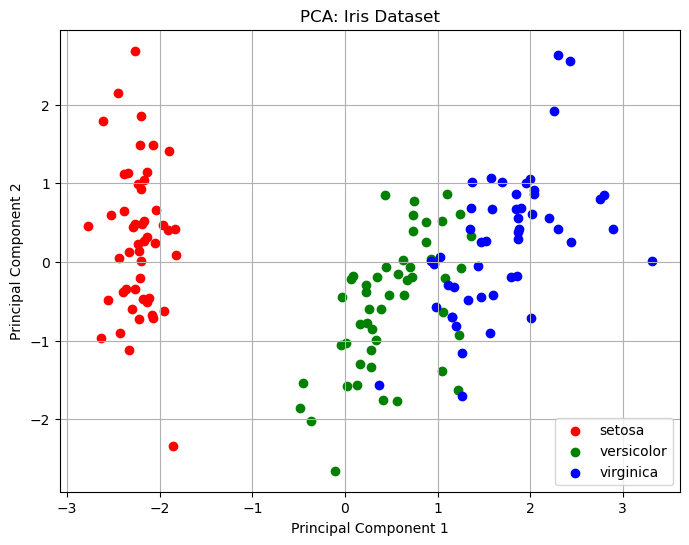

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data (mean=0, variance=1)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Apply PCA for 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variable to the DataFrame for visualization
pca_df['Target'] = y

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
                pca_df.loc[indices, 'Principal Component 2'],
                c=color,
                label=iris.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

## Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

## 
PCA (Principal Component Analysis) and Feature Extraction are closely related concepts. In the context of dimensionality reduction, PCA can be used as a feature extraction technique. It transforms high-dimensional data into a lower-dimensional representation by extracting the most important features (principal components) that capture the most variance in the data.

The principal components obtained through PCA can be interpreted as new features that are linear combinations of the original features. These new features are orthogonal to each other, meaning they are uncorrelated, which makes them useful for capturing the most informative aspects of the data. By selecting a reduced number of principal components, we effectively extract a subset of features that contain the most relevant information from the original data.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data (mean=0, variance=1)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Apply PCA for 2 principal components (feature extraction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variable to the DataFrame for visualization
pca_df['Target'] = iris.target

# Display the PCA-transformed data
print(pca_df.head())

## Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

## 
To preprocess the data for building a recommendation system for a food delivery service using Min-Max scaling in Python, you would follow these steps:

Load the Data: Load the dataset containing features like price, rating, and delivery time for different food items or restaurants.

Data Preparation: Separate the features (price, rating, delivery time) from the target variable (e.g., user ratings or preferences).

Standardization: If necessary, standardize the features (mean=0, variance=1) using techniques like Z-score scaling. However, since you want to use Min-Max scaling, you can skip this step, assuming the features are not already standardized.

Min-Max Scaling:

Instantiate the MinMaxScaler from the scikit-learn library.
Apply Min-Max scaling on the features to transform them into the range [0, 1].
Create the Preprocessed Dataset: Combine the scaled features with the target variable to form the preprocessed dataset.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'data.csv' with the actual filename and path)
data = pd.read_csv('data.csv')

# Separate features and target variable
features = data[['price', 'rating', 'delivery_time']]
target = data['user_rating']  # Assuming 'user_rating' is the target variable (user preferences/ratings)

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling on the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Combine the scaled features with the target variable to create the preprocessed dataset
preprocessed_data = pd.concat([scaled_features_df, target], axis=1)

# Display the preprocessed dataset
print(preprocessed_data.head())

## Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

## 
To use PCA (Principal Component Analysis) to reduce the dimensionality of the dataset in a stock price prediction project, you would follow these steps in Python:

Data Preprocessing: Load and preprocess the dataset. Handle missing values, encode categorical variables (if any), and split the data into features (X) and the target variable (stock prices).

Standardization: Before applying PCA, it's important to standardize the numeric features to have zero mean and unit variance. This step is crucial to ensure that features with larger scales do not dominate the PCA process.

PCA Transformation:

Instantiate the PCA object from the scikit-learn library.

Apply PCA to the standardized features to transform them into a lower-dimensional space.

Explained Variance Ratio:

Analyze the explained variance ratio to understand how much information is retained by each principal component. This helps determine the number of principal components to keep for dimensionality reduction.

Select the Number of Principal Components:

Decide the number of principal components (k) based on the explained variance ratio. You can choose a threshold (e.g., 95% explained variance) or a fixed number of components that capture a significant amount of information.

Project Data onto Principal Components:

Project the standardized features onto the selected k principal components to obtain the lower-dimensional representation of the data.

Inverse Transformation (Optional):

If needed, perform an inverse transformation to obtain the original feature representation in the reduced-dimensional space.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset (replace 'data.csv' with the actual filename and path)
data = pd.read_csv('data.csv')

# Separate features and target variable (stock prices)
features = data.drop(columns=['Stock_Price'])
target = data['Stock_Price']

# Step 2: Standardization
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Step 3: PCA Transformation
pca = PCA()
pca.fit(standardized_features)

# Step 4: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 5: Select the Number of Principal Components
k = 2  # For example, choose the top 2 principal components

# Step 6: Project Data onto Principal Components
reduced_features = pca.transform(standardized_features)[:, :k]

# Optionally, Step 7: Inverse Transformation (if needed)
# original_features = pca.inverse_transform(reduced_features)

# Now, 'reduced_features' contains the lower-dimensional representation of the data

## Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [3]:
import numpy as np

# Given dataset
data = [1, 5, 10, 15, 20]

# Calculate the minimum and maximum values in the dataset
data_min = min(data)
data_max = max(data)

# Perform Min-Max scaling to transform the values to the range of -1 to 1
scaled_data = [((x - data_min) / (data_max - data_min)) * 2 - 1 for x in data]

print("Original Data:", data)
print("Scaled Data (-1 to 1):", scaled_data)

Original Data: [1, 5, 10, 15, 20]
Scaled Data (-1 to 1): [-1.0, -0.5789473684210527, -0.052631578947368474, 0.4736842105263157, 1.0]


## Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

## 
To perform feature extraction using PCA on the given dataset, we first need to preprocess the data, including handling missing values, encoding categorical variables (like gender), and standardizing the numeric features (height, weight, age, and blood pressure) to have zero mean and unit variance.

After preprocessing, we can apply PCA to identify the principal components that capture the most significant variability in the data. The number of principal components to retain is a crucial decision, as it directly impacts the dimensionality reduction. Generally, we want to retain enough principal components to explain a high percentage of the total variance in the data while reducing the dimensionality.

One common approach to determining the number of principal components to keep is to examine the explained variance ratio. The explained variance ratio indicates how much variance each principal component explains relative to the total variance in the data. We can select the number of components that cumulatively explain a desired percentage of the total variance (e.g., 95%).

In [2]:
import pandas as pd
import numpy as np  # Import NumPy library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset with features (replace this with your actual dataset)
data = {
    'height': [170, 165, 180, 160, 175],
    'weight': [70, 60, 80, 55, 65],
    'age': [30, 25, 35, 28, 32],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'blood_pressure': [120, 110, 130, 115, 125]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Encode the 'gender' column (you may use one-hot encoding if needed)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Separate features from the target variable (if available)
features = df.drop(columns=['blood_pressure'])

# Step 1: Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Step 2: Apply PCA
pca = PCA()
pca.fit(standardized_features)

# Step 3: Examine the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Choose the number of principal components to retain
desired_variance_ratio = 0.95
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components_to_retain = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance Ratio:", cumulative_variance_ratio)
print("Number of Principal Components to Retain:", num_components_to_retain)

Explained Variance Ratio: [0.88859297 0.05130402 0.03994499 0.02015802]
Cumulative Variance Ratio: [0.88859297 0.93989699 0.97984198 1.        ]
Number of Principal Components to Retain: 3
